In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

from math import exp
from math import sqrt
from math import ceil
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import ttest_1samp
from scipy.stats import mode
from scipy.stats import ttest_ind
from scipy.stats import norm
from scipy.stats import t

Exercise 1

Consider the following hypothesis test:

H0 : µ = 18

H1 : µ ̸= 18

A sample with n = 48 observations provided a sample mean ¯x = 17 and a sample standard
deviation s = 4.5. It is assumed that the sample is collected from a normal distributed population.

Question I.1 (1)

What is the value of the test statistic (tobs) and what are the critical values with significance
level α = 0.05 (both answers must be correct)?

In [2]:
# Given values
mu = 18  # Null hypothesis mean
x_bar = 17  # Sample mean
s = 4.5  # Sample standard deviation
n = 48  # Sample size
alpha = 0.05  # Significance level

# Degrees of freedom
df = n - 1

# Calculate test statistic (t_obs)
t_obs = (x_bar - mu) / (s / math.sqrt(n))

# Calculate critical t-values for two-tailed test
t_critical_lower = stats.t.ppf(alpha / 2, df)  # Lower critical value
t_critical_upper = stats.t.ppf(1 - alpha / 2, df)  # Upper critical value

# Output results
print("Test Statistic (t_obs):", t_obs)
print("Critical Values (t_critical_lower, t_critical_upper):", (t_critical_lower, t_critical_upper))

Test Statistic (t_obs): -1.539600717839002
Critical Values (t_critical_lower, t_critical_upper): (-2.011740513729766, 2.0117405137297655)


So the awnser must be 1

Question I.2 (2)

From another sample of n = 45 observations, the value of the test statistic (tobs) is -1.74.
Compute the p-value and draw a conclusion using significance level α = 0.05 (both must be
correct)

In [5]:
# Given values
t_obs = -1.74
n = 45
alpha = 0.05

# Degrees of freedom
df = n - 1

# Calculate p-value for two-tailed test
p_value = 2 * t.cdf(t_obs, df)

# Decision
if p_value < alpha:
    conclusion = "Reject the null hypothesis (H0)."
else:
    conclusion = "Fail to reject the null hypothesis (H0)."

# Output
print(f"t-Statistic (t_obs): {t_obs}")
print(f"Degrees of Freedom: {df}")
print(f"p-value: {p_value}")
print(f"Conclusion: {conclusion}")

t-Statistic (t_obs): -1.74
Degrees of Freedom: 44
p-value: 0.08885012244793078
Conclusion: Fail to reject the null hypothesis (H0).


Since the p-value is 0.08885012244793078 we round up and the anwser must be 1. The p-value is 0.0889. We do not reject the null hypothesis

Exerice II

A random sample of n = 30 observations is collected and the sample mean is estimated to be
x¯ = 1.01 and the sample standard deviation s = 0.09.

Question II.1 (3)

What is the 95% confidence interval for the standard deviation?

In [6]:
# Given values
n = 30  # sample size
s = 0.09  # sample standard deviation
alpha = 0.05  # significance level
df = n - 1  # degrees of freedom

# Calculate chi-square critical values
chi2_lower = stats.chi2.ppf(alpha / 2, df)  # lower critical value
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df)  # upper critical value

# Confidence interval for standard deviation
std_lower = np.sqrt((df * s**2) / chi2_upper)  # lower bound
std_upper = np.sqrt((df * s**2) / chi2_lower)  # upper bound
std_lower, std_upper

(0.07167662394863719, 0.12098836613164021)

Again we round up a bit and the awnser is 5

Exercise III

The outcome of an experiment is described by the random variable X, where X has the following
density function:

x     0    1    2   3  4

f(x) 0.17 0.22 0.28 0 0.33

Question III.1 (4)

What is the probability P(X < 3)

In [8]:
# Values for X and corresponding probabilities f(x)
X = [0, 1, 2, 3, 4]
f_x = [0.17, 0.22, 0.28, 0, 0.33]
# Calculate P(X < 3)
P_X_less_3 = sum([f_x[i] for i in range(len(X)) if X[i] < 3])  #change 3 to change the range
print("P(X < 3):", P_X_less_3)

P(X < 3): 0.67
Variance of X: 2.21


The awnser is 5

Question III.2 (5)

The mean of X is 2.10. What is the variance of X?

In [9]:
mean_X = 2.10  # Provided

# Calculate E[X^2]
E_X2 = sum([X[i]**2 * f_x[i] for i in range(len(X))])

# Calculate variance
variance_X = E_X2 - mean_X**2
print("Variance of X:", variance_X)

Variance of X: 2.21


The awnser is 3

Exercise IV

A survey has been conducted to assess the concentration (we shall disregard the unit) of a
chemical compound in the soil in four different locations. The measured concentrations from
the survey are given in the below table:

Location 1      Location 2      Location 3      Location 4

253.7           261.1           257.9           244.1

241.2           244.2           263.5           244.9

255.8           250.5           258.6           243.9

249.3           264.9                           247.1

                259.3

The overall average concentration found across all four locations is 252.5 and the average
concentrations for each location are listed below:

Location                1       2       3       4

Average concentration   250.0   256.0   260.0   245.0

We then fit a one-way ANOVA model on the form

Yij = µ + αi + εij ,

where the errors εij are independent and follow normal distributions with mean 0 and variance σ^2. The overall mean is µ and the effect of Location i is αi. The ANOVA table associated with
the model shows that the total sum of squares, SST, is 915.92 and the location sum of squares,
SS(Location), is 480.00.

Question IV.1 (6)

What is the estimate of the effect of Location 1?

In [29]:
# Data for the four locations
location_1 = [253.7, 241.2, 255.8, 249.3]
location_2 = [261.1, 244.2, 250.5, 264.9, 259.3]
location_3 = [257.9, 263.5, 258.6]
location_4 = [244.1, 244.9, 243.9, 247.1]

# Combine all observations into one list
all_data = location_1 + location_2 + location_3 + location_4

#----- Change all of the code above this line to your own data -----#

# Calculate the overall average
overall_avg = sum(all_data) / len(all_data)

# Output the result
print(f"Overall Average Concentration (mu): {overall_avg}\n")

# Given data
mean_location_1 = 250  # Average concentration for Location 1
overall_avg = 252.5  # Overall mean concentration

# Calculate the effect of Location 1
effect_location_1 = mean_location_1 - overall_avg
print(f"Effect of Location 1: {effect_location_1:.2f}")

Overall Average Concentration (mu): 252.5

Effect of Location 1: -2.50


So the awnser is 1.  -2.5

Question IV.2 (7)

What is the estimate of the error standard deviation?

In [30]:
avg_location_1 = sum(location_1) / len(location_1)
avg_location_2 = sum(location_2) / len(location_2)
avg_location_3 = sum(location_3) / len(location_3)
avg_location_4 = sum(location_4) / len(location_4)

# Total Sum of Squares (SST)
SST = sum((x - overall_avg) ** 2 for x in all_data)

# Location Sum of Squares (SS(Location))
SS_location = (
    len(location_1) * (avg_location_1 - overall_avg) ** 2
    + len(location_2) * (avg_location_2 - overall_avg) ** 2
    + len(location_3) * (avg_location_3 - overall_avg) ** 2
    + len(location_4) * (avg_location_4 - overall_avg) ** 2
)

# Residual Sum of Squares (SS_Error)
SS_error = SST - SS_location

# Degrees of freedom for error
df_error = len(all_data) - 4  # Total observations minus the number of locations

# Error standard deviation
error_std_dev = math.sqrt(SS_error / df_error)

# Output results
print(f"Total Sum of Squares (SST): {SST:.4f}")
print(f"Location Sum of Squares (SS(Location)): {SS_location:.4f}")
print(f"Residual Sum of Squares (SS_Error): {SS_error:.4f}")
print(f"Degrees of Freedom for Error: {df_error}")
print(f"Estimate of the Error Standard Deviation: {error_std_dev:.4f}")

Total Sum of Squares (SST): 915.9200
Location Sum of Squares (SS(Location)): 480.0000
Residual Sum of Squares (SS_Error): 435.9200
Degrees of Freedom for Error: 12
Estimate of the Error Standard Deviation: 6.0272


So here the awnser is 1.  6.0272

Exercise V

12 observations of perfluorooctanesulfonic acid (PFOS) at six different concentrations were analysed using a new experimental testing method SPETT.

PFOS concentrations are measured in mg/kg.

x = np.array([0, 0, 2, 2, 4, 4, 6, 6, 8, 8, 12, 12])  # PFOS concentrations

y = np.array([16, 116, 1170, 841, 2287, 2012, 2653, 3333, 4270, 3999, 5750, 5407])  # SPETT values

The linear regression model

Yi = β0 + β1xi + εi, where εi ∼ N(0, σ2) and i.i.d. for i = 1, . . . , 12,

was set up, where Yi is the SPETT value and xi the PFOS concentration of the i’th observation.

Note that in the remaining of the exercise, the normal distribution and i.i.d. assumptions of the errors are implicit (hence not written with the model).


Question V.1 (8)

What is the estimate of β1?


In [42]:
# Given data
x = np.array([0, 0, 2, 2, 4, 4, 6, 6, 8, 8, 12, 12])  # PFOS concentrations
y = np.array([16, 116, 1170, 841, 2287, 2012, 2653, 3333, 4270, 3999, 5750, 5407])  # SPETT values

# Step 1: Calculate means of x and y
mean_x = np.mean(x)
mean_y = np.mean(y)

# Step 2: Calculate the numerator and denominator for β1
numerator = np.sum((x - mean_x) * (y - mean_y))
denominator = np.sum((x - mean_x) ** 2)

# Step 3: Calculate the estimate of β1
beta_1 = numerator / denominator

# Print the result
print(f"Estimated β1: {beta_1:.1f}")

Estimated β1: 467.6


Here the awnser is 2.

Question V.2 (9)

We wish to test the hypothesis H0 : β0 = 0, as this would indicate whether the expected SPETT value is zero for a PFOS concentration of zero. We use a significance level of α = 0.05.

In [39]:
# Add intercept (for β0)
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X).fit()

# Extract p-value for the intercept (β0)
p_value_beta_0 = model.pvalues[0]  # p-value for the intercept

# Output the result
print(f"P-value for testing H0: β0 = 0: {p_value_beta_0:.4f}\n")

print("More Calculations:")
# Extract key statistics
intercept, slope = model.params
r_squared = model.rsquared
p_values = model.pvalues
t_stat = model.tvalues[0]  # t-statistic for the intercept
t_critical = stats.t.ppf(1 - alpha / 2, df_error)  # critical t-value for two-tailed test

# Print key results
print(f"Intercept (β0): {intercept:.2f}")
print(f"Slope (β1): {slope:.2f}")
print(f"R-squared: {r_squared:.3f}")
print(f"P-values: {p_values}")

# Conclusion
if abs(t_stat) > t_critical:
    print("Reject H0: β0 is significantly different from 0.")
else:
    print("Fail to reject H0: Insufficient evidence to conclude β0 is different from 0.")

P-value for testing H0: β0 = 0: 0.2300

More Calculations
Intercept (β0): 160.73
Slope (β1): 467.58
R-squared: 0.984
P-values: [2.30046902e-01 2.73980001e-10]
Fail to reject H0: Insufficient evidence to conclude β0 is different from 0.


Here the awnser is 2 and we do not reject the null hypothesis.

Question V.3 (10)

Researchers would like to know the uncertainty of the SPETT value for a new observation with PFOS concentration 7 mg/kg. What is the 95% prediction interval at this concentration?


In [43]:
new_x = 7  # New PFOS concentration  --Change to get the prediction for a different value--

# Predicted SPETT value for new_x
beta_0, beta_1 = model.params
y_pred = beta_0 + beta_1 * new_x

# Residual sum of squares (RSS)
RSS = np.sum((y - model.predict(X)) ** 2)

# Degrees of freedom
n = len(x)
df_error = n - 2

# Standard error for prediction
mean_x = np.mean(x)
denominator = np.sum((x - mean_x) ** 2)
SE_pred = np.sqrt((RSS / df_error) * (1 + 1/n + (new_x - mean_x) ** 2 / denominator))

# Critical t-value for 95% confidence
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df_error)

# Prediction interval
lower_bound = y_pred - t_critical * SE_pred
upper_bound = y_pred + t_critical * SE_pred

# Output results
print(f"Predicted SPETT value at PFOS concentration {new_x}: {y_pred:.2f}")
print(f"95% Prediction Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Predicted SPETT value at PFOS concentration 7: 3433.80
95% Prediction Interval: (2829.04, 4038.57)


So here the awnser is 1. [2829, 4039]

Exercise VI

In a high quality paper factory the production occurs in batches. In a quality check experiment,
batches were randomly selected, i.e. the quality is independent between the selected batches. In
the first quality check 20 out of 85 batches were found to not live up to the quality requirement.

Question VI.1 (11)

What is the confidence interval calculated at a significance level α = 10% for the proportion
not living up to the quality requirements (note, use formula to get the correct answer)?


In [5]:
# this task is to calculate the confidence interval of a proportion

# Given data
success = 20   # Percentage / Success rate
n = 85      # Sample size
alpha = 0.10
z_critical = norm.ppf(1 - alpha / 2)  # Z-critical value for two-tailed test

#calculate sample proportion 
p = success/ n

#Calculate the margin of error
margin_of_error = z_critical * sqrt((p * (1 - p)) / n)

#Calculate the confidence interval
lower_bound = p - margin_of_error
upper_bound = p + margin_of_error

print(f"Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")

Confidence Interval: (0.1596, 0.3110)


So here the awnser is 4. [0.160, 0.311] since this is the closest to our calculation.

Question VI.2 (12)

A new quality check is planned. The factory wants a 95% confidence interval with an expected
width of 0.1. As a guess of the population proportion, the observed proportion from the first
quality check is used (i.e. 20 out of 85 batches).

What is the minimum number of batches which must be taken for the new check to achieve
this accuracy?

In [6]:
#Reuses some of the old data from the previous task

#Recalculate the margin of error with new 
margin_error = 0.05  # Desired margin of error
z_critical = norm.ppf(1 - margin_error / 2)  # Z-critical value for 95% confidence level

print(f"Z-critical value: {z_critical}")

# Calculate the minimum sample size
n = (z_critical**2 * p * (1 - p)) / (margin_error**2)
n_min = ceil(n)  # Round up to the nearest whole number

# Output results
print(f"Minimum sample size required: {n_min}")

Z-critical value: 1.959963984540054
Minimum sample size required: 277


So here the awnser is 4. n = 277

Exercise VII

At a Danish company, a study was designed to investigate whether the online training modules
for learning the concepts of sustainability improve trainees knowledge. The trainees participated in a quiz before and after completing the activities of the online training module. The
two quizzes are referred to as pre-test and post-test. Six trainees’ scores in the pre-test (denoted
pre) and post-test (denoted post) are shown in the table below.

Trainee 1 2 3 4 5 6

pre 41 46 35 49 33 42

post 42 47 43 55 28 49

The data is loaded into python:
x = np.array([41, 46, 35, 49, 33, 42])  # Pre test

y = np.array([42, 47, 43, 55, 28, 49])  # #Post test


Question VII.1 (13)

Assuming the samples are from normal distributed populations and the improvement is measured by a difference in the mean of the populations, which of the following codes will result
in the desired hypothesis test after reading in the data?


In [7]:
# Pre-test and post-test scores
x = np.array([41, 46, 35, 49, 33, 42])  # Pre-test
y = np.array([42, 47, 43, 55, 28, 49])  # Post-test

# Perform paired t-test
t_stat, p_value = ttest_rel(y, x)

# Output results
print(f"t-Statistic: {t_stat:.4f}")
print(f"p-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is a significant difference between pre-test and post-test scores.")
else:
    print("Fail to reject H0: No significant difference between pre-test and post-test scores.")

t-Statistic: 1.4877
p-Value: 0.1970
Fail to reject H0: No significant difference between pre-test and post-test scores.


Exercise VIII

It is assumed that the there are 2.5 forest fires on average on a hot summer day, and that the
number of forest fires per day follows a Poisson distribution.

Question VIII.1 (14)

What is the probability that there are at least five forest fires on a hot summer day?

In [12]:
λ = 2.5 #  (mean of Poisson distribution)
k = 5
poisson_prob = poisson.pmf(k, λ)

p_at_least_5 = 1 - poisson.cdf(4, λ)

print(f"P(X = {k}) = {poisson_prob:.4f}") # Probability of exactly 5 forest fires

print(f"Probability of at least 5 forest fires: {p_at_least_5:.4f}") # Probability of at least 5 forest fires

P(X = 5) = 0.0668
Probability of at least 5 forest fires: 0.1088


So here the awnser is 3 since we needed to find value for at least

Question VIII.2 (15)

Let the random variable X represent the number of fores fires in a period of seven consecutive
hot summer days. Which distribution does X follow?

Key Information:
Given Data:

The random variable 𝑋 represents the number of forest fires over seven consecutive hot summer days.
For a single day, the number of forest fires follows a Poisson distribution with a mean 
𝜆 = 2.5 fires/day.
Properties of the Poisson Distribution:

If the number of events per unit time follows a Poisson distribution, then the number of events over multiple independent time periods also follows a Poisson distribution.
The mean of the new distribution is scaled by the number of time periods.
Mean for 7 Days:

Over 7 days, the average number of fires is:

λ-7-days = 7 ⋅ 2.5 =17.5

So the awnser is A 1 Poisson distribution with mean 17.5

Question VIII.3 (16)

It is estimated that 78% of forest fires could have been avoided if simple precautions had been
met. If the fire department one day reports five fores fires, what is the probability that all of
these fores fires could have been avoided if the simple precautions had been met?

In [13]:
# Given data
n = 5  # Total number of fires
p = 0.78  # Probability of avoiding a fire

# Probability that all 5 fires could have been avoided
prob_all_avoided = p**n

# Output the result
print(f"Probability that all 5 fires could have been avoided: {prob_all_avoided:.4f}")

Probability that all 5 fires could have been avoided: 0.2887


Here the awnser 4. 0.289

Exercise IX
30 butterflies were captured and wing lengths were measured in cm. Some summary statistics
of the sample (stored in length cm) are shown below.

round(summary(length_cm),2)
 Min. 1st Qu. Median Mean 3rd Qu. Max.

 3.06 3.72 3.93 4.03 4.32 5.37

round(sd(length_cm),2)

 [1] 0.49

-

Question IX.1 (17)

Perform parametric bootstrapping and simulate 10000 samples assuming that the population
from which the sample was taken follows a normal distribution. Which of the following is the
correct 99% confidence interval for the median of the wing length?
H
INT: If you do the ”default” coding from the book, you will get the correct result with
set.seed(2023).

In [39]:
# Given data
mean_length = 4.03  # Sample mean
sd_length = 0.49    # Sample standard deviation
n = 30              # Sample size
num_bootstrap = 10000  # Number of bootstrap samples

# Set the seed for reproducibility
np.random.seed(2023)

# Generate bootstrap samples and calculate medians
bootstrap_medians = [
    np.median(np.random.normal(mean_length, sd_length, n)) for _ in range(num_bootstrap)
]

# Calculate the 99% confidence interval
lower_bound = np.percentile(bootstrap_medians, 0.5)  # 0.5th percentile
upper_bound = np.percentile(bootstrap_medians, 99.5)  # 99.5th percentile

# Output the results
print(f"99% Confidence Interval for the Median: ({lower_bound:.2f}, {upper_bound:.2f})")

99% Confidence Interval for the Median: (3.74, 4.31)


Here the awnser is 4.

Skipped Task 18 since it was foucused on R and not python.

Exercise X

A study involves two populations: a population of systems analysts using a current technology
and a population of systems analysts using a new software package. The assumption of normal distributed population is fulfilled for both populations. In terms of the time required to
complete a system design project, the population means are as follows:

µ1 is the mean project completion time for systems analysts using the current technology.

µ2 is the mean project completion time for systems analysts using the new software package.

The researcher in charge of the new software package would like to know if the new software
package will provide a shorter mean project completion time. The hypothesis which must be
tested is

H0: µ1 − µ2 = 0

Ha: µ1 − µ2 ̸= 0

The following summary statistics are provided:

• Sample sizes: n1 = 12, n2 = 12

• Sample means: ¯x1 = 325 hours, ¯x2 = 286 hours

• Sample standard deviations: s1 = 40, s2 = 44

-

Question X.1 (19)

What is value of the t-test statistic (tobs) and the degree of freedom (both answers must be
correct)?


In [15]:
# Given data
n1 = 12 # Sample size for Group 1
n2 = 12 # Sample size for Group 2
x1_bar = 325 # Sample mean for Group 1
x2_bar = 286 # Sample mean for Group 2
s1 = 40 # Sample standard deviation for Group 1
s2 = 44 # Sample standard deviation for Group 2

# Calculate the t-test statistic (t_obs)
t_obs = (x1_bar - x2_bar) / sqrt((s1**2 / n1) + (s2**2 / n2))

# Calculate the degrees of freedom (df)
numerator = ((s1**2 / n1) + (s2**2 / n2))**2
denominator = ((s1**2 / n1)**2 / (n1 - 1)) + ((s2**2 / n2)**2 / (n2 - 1))
df = numerator / denominator

# Output the results
print(f"t-Statistic (t_obs): {t_obs:.4f}")
print(f"Degrees of Freedom (df): {df:.4f}")

t-Statistic (t_obs): 2.2720
Degrees of Freedom (df): 21.8031


Here the awnser is 2. 2.27 and df = 21.8

Skipped task 20 and 21

Question XI.3 (22)
Which of the following statements is NOT true?

1 □ Non-parametric bootstrapping is a re-sampling technique used to estimate the variability
of a parameter without making any assumptions about the underlying population.

2 □ Non-parametric bootstrapping involves repeatedly sampling with replacement from the
original sample to create many new, simulated samples of the same size as the original
sample.

3 □ Non-parametric bootstrapping should be preferred over parametric bootstrapping if you
know the distribution of the population.

4 □ Non-parametric bootstrapping can be applied to estimate the 95% confidence interval of
a sample mean.

5 □ Non-parametric bootstrapping can be used to estimate confidence intervals for a parameter and to test hypotheses

Here the correct awnser is 3.

This statement is NOT true. Parametric bootstrapping is actually preferred when the distribution of the population is known, as it can take advantage of the knowledge of the underlying distribution to improve the accuracy and efficiency of the bootstrap estimates. Non-parametric bootstrapping, on the other hand, does not       
require any assumptions about the population distribution.

In contrast, non-parametric bootstrapping should be preferred when:

* The distribution of the population is unknown or suspected to be non-normal.
* The data is complex or has outliers that make parametric assumptions unreliable.
* The goal is to provide a robust and unbiased estimate of variability without making strong assumptions about the underlying distribution.

Exercise XII

A certain industrial process depends on the pH value and the amount of catalyst in a solution.
The relationship between output per hour (kg/h) (efficiency), pH (ph), and the amount of
catalyst used (catalyst) is to be investigated using the following multiple linear regression
model

efficiencyi = β0 + β1 · phi + β2 · catalysti + εi,

where the εi are independent and N(0, σ2
)-distributed. R output from fitting the model to the
data available is shown below:

Skipped 23 and 24 due to beeing an R question and not python.

Exercise XIII

In an experiment, five different chemical substances were mixed with soil in equivalent concentrations. The same type of plants were grown next to each other in each of the five mixes,
hence the plants were exposed to the same growing conditions except for the different chemicals
in the soil.

When the plants were matured, they were harvested for each of the five different chemical-mixed
soil conditions and it was counted how many of them had a trace of the chemicals.
The recorded counts for each of the chemicals were:

In [24]:
# Create the matrix
tbl = np.array([
    [12, 14, 18, 5, 15],
    [38, 35, 35, 42, 35]
])

# Print the matrix
print(tbl)

[[12 14 18  5 15]
 [38 35 35 42 35]]


Question XIII.1 (25)

Under the null hypothesis of no difference in proportion of plants that had no trace of chemicals

H0 : pi = p, i = 1, . . . , 5

what is the expected number of plants with no trace for chemical C?

In [25]:
# Given data


# Total number of plants for each chemical
total_plants_per_chemical = tbl.sum(axis=0)

# Total number of plants with no trace
total_no_trace = tbl[1].sum()

# Expected proportion of plants with no trace under H0
p_no_trace = total_no_trace / total_plants_per_chemical.sum()

# Expected number of plants with no trace for chemical C (3rd column)
expected_no_trace_C = total_plants_per_chemical[2] * p_no_trace

print(f"Expected number of plants with no trace for chemical C: {expected_no_trace_C:.1f}")

Expected number of plants with no trace for chemical C: 39.4


So the awnser is 3.  39.4

Question XIII.2 (26)

What is the conclusion of the hypothesis test using significance level of α = 0.05 for the null
hypothesis that there is no difference in proportion of plants

H0 : pi = p, i = 1, . . . , 5

with trace of chemical (both argument and conclusion must be correct)?


In [26]:
# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(tbl)

# Significance level
alpha = 0.05

# Conclusion
if p_value < alpha:
    conclusion = "Reject the null hypothesis (H0): There is a significant difference in the proportion of plants with trace of chemicals across the five chemicals."
else:
    conclusion = "Fail to reject the null hypothesis (H0): There is no significant difference in the proportion of plants with trace of chemicals across the five chemicals."

# Output results
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"p-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Conclusion: {conclusion}")

Chi-square Statistic: 8.2493
p-Value: 0.0829
Degrees of Freedom: 4
Conclusion: Fail to reject the null hypothesis (H0): There is no significant difference in the proportion of plants with trace of chemicals across the five chemicals.


Here the awnser is 4

Question XIII.3 (27)

In another experiment, seeds from 200 different plant types were selected. For each plant type,
a particular gene modification was made to some seeds. The regular and the modified seeds
were grown pairwise next to each other and thus exposed to the same conditions. After the
plants were matured, their quality for sale was assessed. The resulting counts were

Low Medium High

Low 25 9 19

Medium 23 21 23

High 28 33 19

where the regular seed categories are the rows and the modified seed categories are the columns.
It is desired to carry out a test for independence of the two variables on significance level
α = 0.05. The validity of the test has been checked ok. What is the result of the usual test
(both conclusion and arguments must be correct)?


In [27]:
# Given data
observed = np.array([
    [25, 9, 19],
    [23, 21, 23],
    [28, 33, 19]
])

# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

# Significance level
alpha = 0.05

# Conclusion
if p_value < alpha:
    conclusion = "Reject the null hypothesis (H0): There is a significant association between the seed categories and the quality for sale."
else:
    conclusion = "Fail to reject the null hypothesis (H0): There is no significant association between the seed categories and the quality for sale."

# Output results
print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"p-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Conclusion: {conclusion}")

Chi-square Statistic: 9.5757
p-Value: 0.0482
Degrees of Freedom: 4
Conclusion: Reject the null hypothesis (H0): There is a significant association between the seed categories and the quality for sale.


The awnser here is 2. The relevant p-value is 0.048, thus it is concluded that that the variables are not independent.

Exercise XIV

A random sample of 10 introduction to statistics students’ exam scores has been taken from a
population.


Question XIV.1 (28)

What is the median of the sample?

In [28]:
x = [77, 111, 71, 91, 116, 81, 83, 80, 86, 92]
# Calculate the median of the sample
median_x = np.median(x)
print(f"Median of the sample: {median_x}")

Median of the sample: 84.5


Here the awnser is 1

Question XIV.2 (29)

What is the sample variance?

In [29]:
sample_variance = np.var(x, ddof=1)  # ddof=1 for sample variance
print(f"Sample Variance: {sample_variance:.2f}")

Sample Variance: 209.29


Here the awser is 2

Question 29

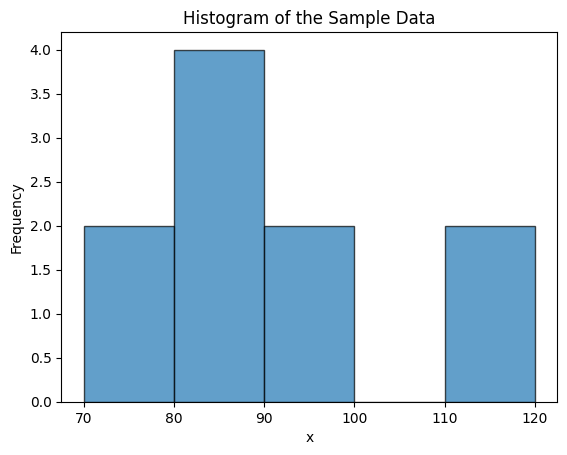

In [30]:
# Given sample data
x = [77, 111, 71, 91, 116, 81, 83, 80, 86, 92]

# Plot the histogram with bins corresponding to the given histograms
plt.hist(x, bins=[70, 80, 90, 100, 110, 120], edgecolor='black', alpha=0.7)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of the Sample Data')
plt.show()

The awnser should be a since thats the best fit we get